In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
DATA_PATH_DTB_TOANKHOA = '/content/drive/MyDrive/Education_dataset_V2/sinhvien_dtb_toankhoa.xlsx'
DATA_PATH_NHANCHUADAT ='/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/data_exist_in_file_sinhvien/data_not_in_tot_nghiep/valid_nhanchuadat_dataset_dtb_sinhvien_reverified.csv'

In [23]:
df_nhan_chua_dat = pd.read_csv(DATA_PATH_NHANCHUADAT)

In [24]:
df_dtb_toankhoa = pd.read_excel(DATA_PATH_DTB_TOANKHOA)

In [38]:
def label_data(diem):
  if diem>=8:
    return 0;
  elif diem>=7:
    return 1;
  elif diem>=6:
    return 2;
  elif diem>=5:
    return 3;
  else:
    return 4;

In [26]:
df_dtb_toankhoa['label'] = df_dtb_toankhoa['dtb_toankhoa'].apply(label_data)

In [27]:
#Gán nhãn lại cho các sinh viên bên nhãn chưa đạt bằng 4
for index,row in df_dtb_toankhoa.iterrows():
  if row['mssv'] in df_nhan_chua_dat['mssv'].values:
    df_dtb_toankhoa.loc[index,'label'] = 4

In [28]:
df_dtb_toankhoa.head()

,mssv,dtb_toankhoa,dtb_tichluy,sotc_tichluy,label
0,C410FEC4XPvAibaEXe/odi52as1TQ/z6UAtEIyTx,7.00,7.00,144.0,2
1,4555C74CXPvAibaEXe8UBGVVSBKSkjQKdKZAX7FE,6.34,6.34,153.0,3
2,6FB8C971XPvAibaEXe8zjuWfAVBr9Syz83phZPbU,2.31,0.00,0.0,5
3,7D7299A4XPvAibaEXe9hYalhCsDQbVspsqAf44vo,8.21,8.21,148.0,1
4,590263C4XPvAibaEXe9mDsFtgVHJ/lr5wIkYTfyo,8.32,8.32,148.0,1


In [29]:
df_totnghiep = pd.read_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/1.dataset_cleaned/totnghiep_cleaned.csv')

In [30]:
df_totnghiep[' xeploai'].unique()

array(['Khá', 'Giỏi', 'TB Khá', 'Xuất sắc'], dtype=object)

In [31]:
df_totnghiep['label'] = df_totnghiep[' xeploai'].apply(
    lambda x: 1 if x == 'Khá' else 2 if x == 'TB Khá' else 0
)


In [34]:
#Điền lại tôn trọng nhãn của file tốt nghiệp
for index,row in df_dtb_toankhoa.iterrows():
  if row['mssv'] in df_totnghiep['mssv'].values:
    df_dtb_toankhoa.loc[index,'label'] = df_totnghiep.loc[df_totnghiep['mssv']==row['mssv'],'label'].values[0]

In [35]:
selected_columns = df_dtb_toankhoa[['mssv','label']]

In [37]:
selected_columns['label'].value_counts()

,count
label,
2,5209
1,3302
3,2339
5,2209
4,707
0,204


<ipython-input-15-9911ed560cea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


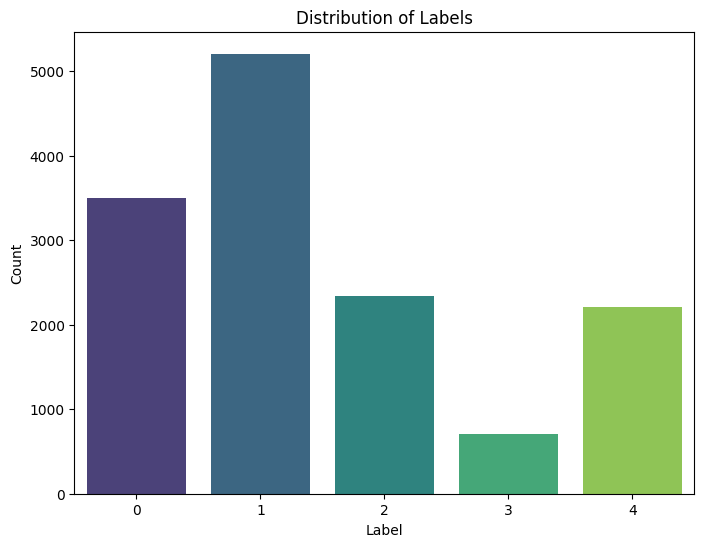

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = selected_columns['label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


In [ ]:
selected_columns.to_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/3.data_processing/data-final/label/label_clean.csv',index=False)